<a href="https://colab.research.google.com/github/buon-viaggio/SOCAR-AI-BOOT-CAMP/blob/main/Assignment_1_ETA_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1. Make the best model for TADA ETA data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터셋 생성 방법들



#### 일반 데이터셋 생성



*   ATA: Actual Time of Arrival
*   ETA: Expected Time of Arrival
*   api_eta: 앱 API에서 예측된 ETA



In [ ]:
tada_eta = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/tada_eta.xlsx')
print(tada_eta.columns)
tada_eta.head()

Index(['ATA', 'id', 'api_eta', 'created_at_kst', 'month', 'pickup_lng',
       'pickup_lat', 'pickup_gu', 'driver_id', 'driver_lng', 'driver_lat',
       'hour'],
      dtype='object')


,ATA,id,api_eta,created_at_kst,month,pickup_lng,pickup_lat,pickup_gu,driver_id,driver_lng,driver_lat,hour
0,10.60,R4L9FL6NVEL4D0,5.65,2019-12-01T00:55:09,12,127.091399,37.624545,노원구,DST52944,127.069978,37.616472,0
1,9.20,R3A7JBY7CS6TPD,8.60,2019-12-01T00:09:39,12,127.023351,37.625564,강북구,DPC72995,127.026479,37.604711,0
2,10.85,R2BIUY1TDK14XE,10.53,2019-12-15T00:18:42,12,126.881154,37.481641,금천구,DPP94923,126.906225,37.452167,0
3,5.52,R31PU5GNHSGU6C,1.92,2019-07-31T00:24:11,7,126.988375,37.567897,중구,DCT73585,126.991170,37.566416,0
4,8.60,R41WR6N1VT42DJ,7.10,2019-07-05T00:40:34,7,126.988684,37.566716,중구,DPJ86237,127.006860,37.571164,0


In [ ]:
tada_eta['distance'] = ((tada_eta['pickup_lat']-tada_eta['driver_lat'])**2 + (tada_eta['pickup_lng']-tada_eta['driver_lng'])**2)*100000
tada_eta = tada_eta.drop(['id', 'created_at_kst', 'driver_id', 'pickup_lng', 'pickup_lat', 'driver_lng','driver_lat','pickup_gu'],1)
tada_eta.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,ATA,api_eta,month,hour,distance
0,10.60,5.65,12,0,52.400202
1,9.20,8.60,12,0,44.465889
2,10.85,10.53,12,0,149.731535
3,5.52,1.92,7,0,1.000535
4,8.60,7.10,7,0,35.014797


In [ ]:
tada_eta = tada_eta.sample(frac=1, random_state=0).reset_index(drop=True)
tada_eta.head()

,ATA,api_eta,month,hour,distance
0,6.13,8.32,12,22,44.521977
1,5.37,3.05,12,11,3.989066
2,6.27,5.00,7,19,4.814699
3,10.52,8.47,12,21,77.341173
4,12.45,6.65,7,12,14.888851


In [ ]:
tada_eta.shape

(13916, 5)

In [ ]:
train = tada_eta[:12000]
test = tada_eta[12000:]

In [ ]:
x_train = np.asarray(train.drop('ATA',1))
y_train = np.asarray(train['ATA'])
x_test = np.asarray(test.drop('ATA',1))
y_test = np.asarray(test['ATA'])
eta_features = [x for i,x in enumerate(tada_eta.columns) if i!=0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
eta_features

['api_eta', 'month', 'hour', 'distance']

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

#### category feature 추가된 데이터셋 생성

In [ ]:
# Ordianl Encoding 적용
import sklearn

tada_eta_ordinal = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/tada_eta.xlsx')

enc = sklearn.preprocessing.OrdinalEncoder(dtype=np.int32)
ordinal = enc.fit_transform(np.asarray(tada_eta_ordinal['pickup_gu']).reshape(-1,1))
tada_eta_ordinal['pickup_gu'] = ordinal[:,0]
tada_eta_ordinal['distance'] = ((tada_eta_ordinal['pickup_lat']-tada_eta_ordinal['driver_lat'])**2 + (tada_eta_ordinal['pickup_lng']-tada_eta_ordinal['driver_lng'])**2)*100000
tada_eta_ordinal = tada_eta_ordinal.drop(['id', 'created_at_kst', 'driver_id', 'pickup_lng', 'pickup_lat', 'driver_lng','driver_lat'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
tada_eta_ordinal.head()

,ATA,api_eta,month,pickup_gu,hour,distance
0,10.60,5.65,12,8,0,52.400202
1,9.20,8.60,12,2,0,44.465889
2,10.85,10.53,12,7,0,149.731535
3,5.52,1.92,7,23,0,1.000535
4,8.60,7.10,7,23,0,35.014797


In [ ]:
tada_eta_ordinal = tada_eta_ordinal.sample(frac=1, random_state=0).reset_index(drop=True)

In [ ]:
train_ordinal = tada_eta_ordinal[:12000]
test_ordinal = tada_eta_ordinal[12000:]

In [ ]:
X_train = np.asarray(train_ordinal.drop('ATA',1))
Y_train = np.asarray(train_ordinal['ATA'])
X_test = np.asarray(test_ordinal.drop('ATA',1))
Y_test = np.asarray(test_ordinal['ATA'])
eta_ordinal_features = [x for i,x in enumerate(tada_eta_ordinal.columns) if i!=0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


#### category feature + drop 없는 데이터셋 생성

In [ ]:
# Ordianl Encoding 적용
import sklearn

tada_eta_raw_ordinal = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/tada_eta.xlsx')

enc = sklearn.preprocessing.OrdinalEncoder(dtype=np.int32)
ordinal = enc.fit_transform(np.asarray(tada_eta_raw_ordinal['pickup_gu']).reshape(-1,1))
tada_eta_raw_ordinal['pickup_gu'] = ordinal[:,0]
tada_eta_raw_ordinal['distance'] = ((tada_eta_raw_ordinal['pickup_lat']-tada_eta_raw_ordinal['driver_lat'])**2 + (tada_eta_raw_ordinal['pickup_lng']-tada_eta_raw_ordinal['driver_lng'])**2)*100000
tada_eta_raw_ordinal = tada_eta_raw_ordinal.drop(['id','driver_id', 'created_at_kst'],1)

tada_eta_raw_ordinal = tada_eta_raw_ordinal.sample(frac=1, random_state=0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
train_raw_ordinal = tada_eta_raw_ordinal[:12000]
test_raw_ordinal = tada_eta_raw_ordinal[12000:]

In [ ]:
X_train = np.asarray(train_raw_ordinal.drop('ATA',1))
Y_train = np.asarray(train_raw_ordinal['ATA'])
X_test = np.asarray(test_raw_ordinal.drop('ATA',1))
Y_test = np.asarray(test_raw_ordinal['ATA'])
eta_ordinal_features = [x for i,x in enumerate(tada_eta_raw_ordinal.columns) if i!=0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

# train set과 test set의 input과 output를 각각 이어 붙여서 X,y를 정의
X = np.concatenate((X_train,X_test), axis=0)
Y = np.concatenate((Y_train,Y_test), axis=0)

# 전체 데이터 X에서 training data에 해당하는 index는 -1, test data에 해당하는 index는 0이 되도록,
# 여기서는 [-1, -1, ... , -1, 0, 0, ... , 0] 같은 형태의 1차원 배열 test fold와 predefined split을 정의
pds = PredefinedSplit(test_fold=[-1]*len(X_train)+[0]*len(X_test))

# Parameters
# loss='squared_error', quantile=None, learning_rate=0.1, max_iter=100,
# max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0,
# max_bins=255, categorical_features=None, monotonic_cst=None, warm_start=False,
# early_stopping='auto', scoring='loss', validation_fraction=0.1,
# n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None

param_grid = {'loss': ['squared_error'],
              'learning_rate': [0.1, 0.07, 0.05, 0.03, 0.01],
              'max_iter': [100, 200, 300],
              'max_leaf_nodes': [2, 5, 10, 20, 30, 50], # 2보다 작으면 안됨
              'max_depth': [2, 5, 10, 15],
#              'categorical_features': [3],
              }
# grid search 모델 정의, 학습 및 model selection
grid_search = GridSearchCV(estimator=ensemble.HistGradientBoostingRegressor(), 
                           param_grid=param_grid, 
                           cv=pds, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, Y)
print(grid_search.best_params_)

# 분석 결과
# Fitting 1 folds for each of 360 candidates, totalling 360 fits
# {'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 15, 'max_iter': 100, 'max_leaf_nodes': 30}

Fitting 1 folds for each of 360 candidates, totalling 360 fits
{'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 15, 'max_iter': 100, 'max_leaf_nodes': 30}


In [ ]:
reg = ensemble.HistGradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.05,
    max_iter=100,
    max_leaf_nodes=30,
    max_depth=15,
    verbose=0
)

reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(Y_test, X_test[:,0]) ))

mae = mean_absolute_error(Y_test, reg.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(Y_test, X_test[:,0]) ))

The mean squared error (MSE) on test set: 8.2815
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0718
The initial error of API ETA on test set: 2.7047


#### 서울시 차량 데이터 추가한 데이터셋 생성

In [ ]:
# car_vel : 서울시 자치구별 차량 통행속도 2021년도 평균값
# car_num : 서울시 자치구별 등록된 차량수 통계 (2022.03 기준)

In [ ]:
import sklearn

tada_eta_add = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/tada_eta_added.xlsx')

enc = sklearn.preprocessing.OrdinalEncoder(dtype=np.int32)
ordinal = enc.fit_transform(np.asarray(tada_eta_add['pickup_gu']).reshape(-1,1))
tada_eta_add['pickup_gu'] = ordinal[:,0]
tada_eta_add['distance'] = ((tada_eta_add['pickup_lat']-tada_eta_add['driver_lat'])**2 + (tada_eta_add['pickup_lng']-tada_eta_add['driver_lng'])**2)*100000


In [ ]:
tada_eta_add = tada_eta_add.drop(['num', 'id', 'created_at_kst', 'driver_id', 'pickup_lng', 'pickup_lat', 'driver_lng','driver_lat'],1)
tada_eta_add = tada_eta_add.sample(frac=1, random_state=0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
print(tada_eta_add)

         ATA  api_eta  month  pickup_gu  hour  car_vel  car_num   distance
0       6.13     8.32     12         12    22     23.7   121250  44.521977
1       5.37     3.05     12         17    11     22.9   248750   3.989066
2       6.27     5.00      7         22    19     22.6    50832   4.814699
3      10.52     8.47     12         20    21     26.1    79420  77.341173
4      12.45     6.65      7          0    12     23.7   240480  14.888851
...      ...      ...    ...        ...   ...      ...      ...        ...
13911   4.62     5.72     12          0    23     23.7   240480  18.709908
13912   5.33     2.80     12         14     8     24.9   176639   0.670255
13913   7.82     6.85     12         19    18     22.9   145946  65.936939
13914   3.72     1.42      7          0    20     23.7   240480   0.554555
13915   7.48     4.38     12         14     7     24.9   176639   3.751006

[13916 rows x 8 columns]


In [ ]:
train_add = tada_eta_add[:12000]
test_add = tada_eta_add[12000:]

X_train = np.asarray(train_add.drop('ATA',1))
Y_train = np.asarray(train_add['ATA'])
X_test = np.asarray(test_add.drop('ATA',1))
Y_test = np.asarray(test_add['ATA'])
eta_add_features = [x for i,x in enumerate(tada_eta_add.columns) if i!=0]

In [ ]:
print(eta_add_features)

['api_eta', 'month', 'pickup_gu', 'hour', 'car_vel', 'car_num', 'distance']


## Best & Last Trial - XGBoost 모델 사용

- Gradient Boosting, Random Forest Boosting, Hist Gradient Boosting 중 Hist Gradient 모델 성능이 가장 좋았음.
- GridSearchCV와 PredefinedSplit을 함께 Hist Gradient Boosting과 함께 사용했을 때, 가장 성능이 좋았으나, 목표하는 오차범위 도달 X.
- 서울시 공공 데이터를 활용해 feature를 추가했으나, 오차가 유의미하게 줄어들지 않음.
- 다양한 하이퍼 파라미터 최적화 기법을 시도했으나, 오히려 오차가 더 커지기도 하는 등 유효한 결과를 거두지 못함. (사용에 있어서 아직 부족한 부분이 많음)

이에, **신규 트리 모델 XGBoost를 도입해보기로 했고, 성능이 가장 우수했음.**

- 마지막 결론까지 시도했던 내용은 해당 XGBoost 모델 코드 하단에 추가해 두었습니다.



**XGBoost 실행결과**
1. 일반 데이터셋 사용 시 : distance 값만 포함
*   MSE on test set: 7.6853
*   API ETAon test set: 13.7135
*   MAE on test set: 2.0281
*   API ETA on test set: 2.7047

2. **[BEST RESULT]** 보강된 데이터셋 사용 시 : 서울시 공공데이터 추가 활용 (tada_data_added.xlsx 파일 추가 생성)
*   MSE on test set: 7.1371
*   API ETAon test set: 13.7135
*   MAE on test set: 1.9611
*   API ETA on test set: 2.7047

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
                          learning_rate = 0.5, max_depth = 10, alpha = 10, n_estimators = 10)

xg_reg.fit(X,Y)

[10:57:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, learning_rate=0.5, max_depth=10,
             n_estimators=10)

In [ ]:
mse = mean_squared_error(Y_test, xg_reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(Y_test, X_test[:,0]) ))

mae = mean_absolute_error(Y_test, xg_reg.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(Y_test, X_test[:,0]) ))

The mean squared error (MSE) on test set: 7.1371
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 1.9611
The initial error of API ETA on test set: 2.7047


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
                          learning_rate = 0.5, max_depth = 10, alpha = 10, n_estimators = 10)

xg_reg.fit(X,Y)

[12:40:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, learning_rate=0.5, max_depth=10,
             n_estimators=10)

In [ ]:
mse = mean_squared_error(y_test, xg_reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, xg_reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

The mean squared error (MSE) on test set: 7.6853
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0281
The initial error of API ETA on test set: 2.7047


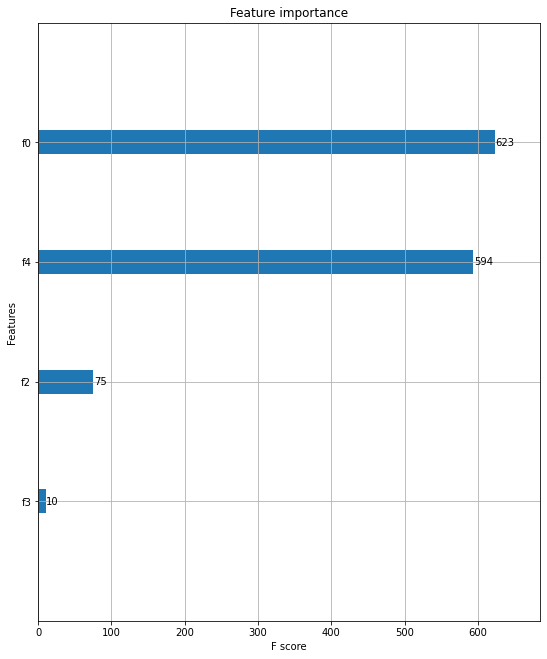

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,11))
plot_importance(xg_reg, ax)

## MODELING TRIALS

#### 실습코드: Gradient Boosting 사용
*   MSE on test set: 8.4021
*   API ETAon test set: 13.7135
*   MAE on test set: 2.0853
*   API ETA on test set: 2.7047

In [ ]:
reg = ensemble.GradientBoostingRegressor(
           n_estimators=100, 
           max_depth=3, 
           min_samples_leaf=5,
           learning_rate=0.05,
           loss='ls')
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 8.4021
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0853
The initial error of API ETA on test set: 2.7047


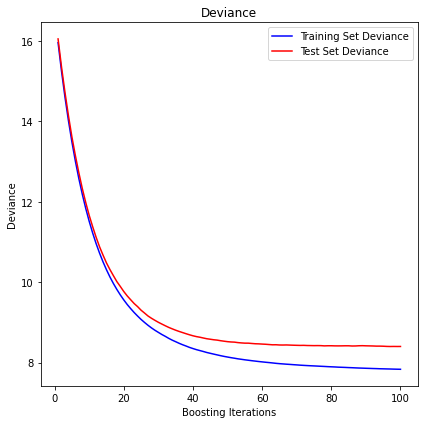

In [ ]:
params={'n_estimators': 100}
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

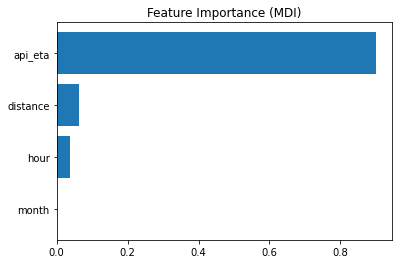

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(eta_features)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

#### Trial 1 - Gradient Boosting + GridSearchCV

*   MSE on test set: 8.3613
*   API ETAon test set: 13.7135
*   MAE on test set: 2.0815
*   API ETA on test set: 2.7047

In [ ]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
# Hyperparameter 조합 정의
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [2, 3, 4, 5],
              'min_samples_leaf': [1, 20, 100],
              'learning_rate': [0.01, 0.02, 0.05],
              'loss': ['ls']}
# grid search 모델 정의, 학습 및 model selection
grid_search = GridSearchCV(estimator=ensemble.GradientBoostingRegressor(),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
reg = ensemble.GradientBoostingRegressor(**grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


{'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 2, 'min_samples_leaf': 20, 'n_estimators': 200}


In [ ]:
# GridSearchCV 결과
# {'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 2, 'min_samples_leaf': 20, 'n_estimators': 200}
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 8.3613
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0815
The initial error of API ETA on test set: 2.7047


In [ ]:
reg = ensemble.GradientBoostingRegressor(
           n_estimators=200, 
           max_depth=2, 
           min_samples_leaf=20,
           learning_rate=0.05,
           max_features='sqrt',
           loss='ls',
           random_state=0
           )
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 8.3479
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0813
The initial error of API ETA on test set: 2.7047


#### Trial 2 - Gradient Boosting + GridSearchCV + PredefinedSplit

*   MSE on test set: 8.2613
*   API ETAon test set: 13.7135
*   MAE on test set: 2.0720
*   API ETA on test set: 2.7047

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

# train set과 test set의 input과 output를 각각 이어 붙여서 X,y를 정의
X = np.concatenate((x_train,x_test), axis=0)
y = np.concatenate((y_train,y_test), axis=0)

# 전체 데이터 X에서 training data에 해당하는 index는 -1, test data에 해당하는 index는 0이 되도록,
# 여기서는 [-1, -1, ... , -1, 0, 0, ... , 0] 같은 형태의 1차원 배열 test fold와 predefined split을 정의
pds = PredefinedSplit(test_fold=[-1]*len(x_train)+[0]*len(x_test))
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [2, 3, 4, 5],
              'min_samples_leaf': [1, 20, 100],
              'learning_rate': [0.01, 0.02, 0.05],
              'loss': ['ls']}
# grid search 모델 정의, 학습 및 model selection
grid_search = GridSearchCV(estimator=ensemble.GradientBoostingRegressor(), 
                           param_grid=param_grid, 
                           cv=pds, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, y)
print(grid_search.best_params_)

# 분석 결과
# {'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 2, 'min_samples_leaf': 100, 'n_estimators': 300}

Fitting 1 folds for each of 108 candidates, totalling 108 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


{'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 2, 'min_samples_leaf': 100, 'n_estimators': 300}


In [ ]:
reg = ensemble.GradientBoostingRegressor(
           n_estimators=300, 
           max_depth=2, 
           min_samples_leaf=100,
           learning_rate=0.05,
           max_features='sqrt',
           loss='ls',
           random_state=0
           )
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 8.2613
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0720
The initial error of API ETA on test set: 2.7047


#### Trial 3 - Random Forest Boosting + GridSearchCV
*   MSE on test set: 8.2968
*   API ETAon test set: 13.7135
*   MAE on test set: 2.0735
*   API ETA on test set: 2.7047

In [ ]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
# Hyperparameter 조합 정의
# n_estimators=100, criterion='squared_error', max_depth=None, 
# min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
# max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
# warm_start=False, ccp_alpha=0.0, max_samples=None
param_grid = {'n_estimators': [100, 200, 300],
              'min_samples_leaf': [1, 20, 100],
              'max_depth': [2, 3, 4, 5, 10],
              'max_features': ['sqrt', 'log2'],
              'criterion': ['squared_error'],
              'max_samples': [0.01, 0.02, 0.05, 0.07],
              'random_state': [0],
              'ccp_alpha': [0, 0.01, 0.03, 0.05]   # Complexity parameter used for Minimal Cost-Complexity Pruning
              }
# grid search 모델 정의, 학습 및 model selection
grid_search = GridSearchCV(estimator=ensemble.RandomForestRegressor(),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
reg = ensemble.RandomForestRegressor(**grid_search.best_params_)

# 결과
# Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
# {'ccp_alpha': 0.01, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'max_samples': 0.07, 'min_samples_leaf': 1, 'n_estimators': 300, 'random_state': 0}

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
{'ccp_alpha': 0.01, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'max_samples': 0.07, 'min_samples_leaf': 1, 'n_estimators': 300, 'random_state': 0}


In [ ]:
# Random Forest Regressor 사용
reg = ensemble.RandomForestRegressor(
           n_estimators=300,  
           min_samples_leaf=1,
           max_depth=10,
           max_features='sqrt',
           criterion='squared_error',
           random_state=0,
           max_samples=0.07,
           ccp_alpha=0.01)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 8.2968
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0735
The initial error of API ETA on test set: 2.7047


#### Trial 4 - Random Forest Boosting + GridSearchCV + PredefinedSplit
*   MSE on test set: 8.2559
*   API ETAon test set: 13.7135
*   MAE on test set: 2.0712
*   API ETA on test set: 2.7047

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

# train set과 test set의 input과 output를 각각 이어 붙여서 X,y를 정의
X = np.concatenate((x_train,x_test), axis=0)
y = np.concatenate((y_train,y_test), axis=0)

# 전체 데이터 X에서 training data에 해당하는 index는 -1, test data에 해당하는 index는 0이 되도록,
# 여기서는 [-1, -1, ... , -1, 0, 0, ... , 0] 같은 형태의 1차원 배열 test fold와 predefined split을 정의
pds = PredefinedSplit(test_fold=[-1]*len(x_train)+[0]*len(x_test))
param_grid = {'n_estimators': [100, 200, 300],
              'min_samples_leaf': [1, 10, 20],
              'max_depth': [2, 5, 10, 15],
              'max_features': ['sqrt'],
              'criterion': ['squared_error'],
              'max_samples': [0.05, 0.07, 0.09],
              'random_state': [0],
              'ccp_alpha': [0.01]
              }
# grid search 모델 정의, 학습 및 model selection
grid_search = GridSearchCV(estimator=ensemble.RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=pds, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, y)
print(grid_search.best_params_)

# 분석 결과
# Fitting 1 folds for each of 108 candidates, totalling 108 fits
# {'ccp_alpha': 0.01, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'max_samples': 0.09, 'min_samples_leaf': 10, 'n_estimators': 200, 'random_state': 0}

Fitting 1 folds for each of 108 candidates, totalling 108 fits
{'ccp_alpha': 0.01, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'max_samples': 0.09, 'min_samples_leaf': 10, 'n_estimators': 200, 'random_state': 0}


In [ ]:
reg = ensemble.RandomForestRegressor(
           n_estimators=200,  
           min_samples_leaf=10,
           max_depth=10,
           max_features='sqrt',
           criterion='squared_error',
           random_state=0,
           max_samples=0.09,
           ccp_alpha=0.01)

reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

The mean squared error (MSE) on test set: 8.2559
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0712
The initial error of API ETA on test set: 2.7047


#### Trial 5 - HistGradientBoostingRegressor
*   MSE on test set: 8.3438
*   API ETAon test set: 13.7135
*   MAE on test set: 2.0780
*   API ETA on test set: 2.7047

In [ ]:
# HistGradientBoostingRegressor 적용
# loss='squared_error', quantile=None, learning_rate=0.1, max_iter=100,
# max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0,
# max_bins=255, categorical_features=None, monotonic_cst=None, warm_start=False,
# early_stopping='auto', scoring='loss', validation_fraction=0.1,
# n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None

reg = ensemble.HistGradientBoostingRegressor(
           max_iter=300, 
           max_depth=10, 
           min_samples_leaf=5,
           learning_rate=0.05,
           loss='squared_error')
reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(Y_test, X_test[:,0]) ))

mae = mean_absolute_error(Y_test, reg.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(Y_test, X_test[:,0]) ))

The mean squared error (MSE) on test set: 8.3438
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0780
The initial error of API ETA on test set: 2.7047


#### Trial 6 - HistGradientBoostingRegressor + GridSearchCV + PredefinedSplit
*   MSE on test set: 8.2547
*   API ETAon test set: 13.7135
*   MAE on test set: 2.0709
*   API ETA on test set: 2.7047

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

# train set과 test set의 input과 output를 각각 이어 붙여서 X,y를 정의
X = np.concatenate((X_train,X_test), axis=0)
Y = np.concatenate((Y_train,Y_test), axis=0)

# 전체 데이터 X에서 training data에 해당하는 index는 -1, test data에 해당하는 index는 0이 되도록,
# 여기서는 [-1, -1, ... , -1, 0, 0, ... , 0] 같은 형태의 1차원 배열 test fold와 predefined split을 정의
pds = PredefinedSplit(test_fold=[-1]*len(X_train)+[0]*len(X_test))

# Parameters
# loss='squared_error', quantile=None, learning_rate=0.1, max_iter=100,
# max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0,
# max_bins=255, categorical_features=None, monotonic_cst=None, warm_start=False,
# early_stopping='auto', scoring='loss', validation_fraction=0.1,
# n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None

param_grid = {'loss': ['squared_error'],
              'learning_rate': [0.1, 0.07, 0.05, 0.03, 0.01],
              'max_iter': [100, 200, 300],
              'max_leaf_nodes': [2, 5, 10, 20, 30, 50], # 2보다 작으면 안됨
              'max_depth': [2, 5, 10, 15]
              }
# grid search 모델 정의, 학습 및 model selection
grid_search = GridSearchCV(estimator=ensemble.HistGradientBoostingRegressor(), 
                           param_grid=param_grid, 
                           cv=pds, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, Y)
print(grid_search.best_params_)

# 분석 결과
# Fitting 1 folds for each of 360 candidates, totalling 360 fits
# {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 5, 'max_iter': 200, 'max_leaf_nodes': 5}

Fitting 1 folds for each of 360 candidates, totalling 360 fits
{'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 5, 'max_iter': 200, 'max_leaf_nodes': 5}


In [ ]:
reg = ensemble.HistGradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.1,
    max_iter=200,
    max_leaf_nodes=5,
    max_depth=5,
    verbose=0
)

reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(Y_test, X_test[:,0]) ))

mae = mean_absolute_error(Y_test, reg.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(Y_test, X_test[:,0]) ))

The mean squared error (MSE) on test set: 8.2575
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0701
The initial error of API ETA on test set: 2.7047


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

# train set과 test set의 input과 output를 각각 이어 붙여서 X,y를 정의
X = np.concatenate((x_train,x_test), axis=0)
Y = np.concatenate((y_train,y_test), axis=0)

# 전체 데이터 X에서 training data에 해당하는 index는 -1, test data에 해당하는 index는 0이 되도록,
# 여기서는 [-1, -1, ... , -1, 0, 0, ... , 0] 같은 형태의 1차원 배열 test fold와 predefined split을 정의
pds = PredefinedSplit(test_fold=[-1]*len(x_train)+[0]*len(x_test))

param_grid = {'loss': ['squared_error'],
              'learning_rate': [0.1, 0.07, 0.05, 0.03, 0.01],
              'max_iter': [100, 200, 300],
              'max_leaf_nodes': [2, 5, 10, 20, 30, 50], # 2보다 작으면 안됨
              'max_depth': [2, 5, 10, 15]
              }
# grid search 모델 정의, 학습 및 model selection
grid_search = GridSearchCV(estimator=ensemble.HistGradientBoostingRegressor(), 
                           param_grid=param_grid, 
                           cv=pds, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, Y)
print(grid_search.best_params_)

# 분석 결과
# Fitting 1 folds for each of 360 candidates, totalling 360 fits
# {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 5, 'max_iter': 200, 'max_leaf_nodes': 5}

Fitting 1 folds for each of 360 candidates, totalling 360 fits
{'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'max_iter': 200, 'max_leaf_nodes': 30}


In [ ]:
reg = ensemble.HistGradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.1,
    max_iter=200,
    max_leaf_nodes=30,
    max_depth=2,
    verbose=0
)

reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

The mean squared error (MSE) on test set: 8.2968
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0772
The initial error of API ETA on test set: 2.7047


#### Trial 7 - Random Forest Boosting + GridSearchCV + PredefinedSplit + Ordinal Encoding
*   MSE on test set: 8.2673
*   API ETAon test set: 13.7135
*   MAE on test set: 2.0782
*   API ETA on test set: 2.7047

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

In [ ]:
# train set과 test set의 input과 output를 각각 이어 붙여서 X,y를 정의
X = np.concatenate((X_train,X_test), axis=0)
Y = np.concatenate((Y_train,Y_test), axis=0)

# 전체 데이터 X에서 training data에 해당하는 index는 -1, test data에 해당하는 index는 0이 되도록,
# 여기서는 [-1, -1, ... , -1, 0, 0, ... , 0] 같은 형태의 1차원 배열 test fold와 predefined split을 정의
pds = PredefinedSplit(test_fold=[-1]*len(X_train)+[0]*len(X_test))
param_grid = {'n_estimators': [100, 200, 300],
              'min_samples_leaf': [1, 10, 20],
              'max_depth': [2, 5, 10, 15],
              'max_features': ['sqrt'],
              'criterion': ['squared_error'],
              'max_samples': [0.05, 0.07, 0.09],
              'random_state': [0],
              'ccp_alpha': [0.01]
              }
# grid search 모델 정의, 학습 및 model selection
grid_search = GridSearchCV(estimator=ensemble.RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=pds, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, Y)
print(grid_search.best_params_)

# 분석 결과
#

Fitting 1 folds for each of 108 candidates, totalling 108 fits
{'ccp_alpha': 0.01, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': 'sqrt', 'max_samples': 0.09, 'min_samples_leaf': 10, 'n_estimators': 300, 'random_state': 0}


In [ ]:
reg = ensemble.RandomForestRegressor(
           n_estimators=300,  
           min_samples_leaf=10,
           max_depth=15,
           max_features='sqrt',
           criterion='squared_error',
           random_state=0,
           max_samples=0.09,
           ccp_alpha=0.01)

reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(Y_test, X_test[:,0]) ))

mae = mean_absolute_error(Y_test, reg.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(Y_test, X_test[:,0]) ))

The mean squared error (MSE) on test set: 8.2673
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0782
The initial error of API ETA on test set: 2.7047


#### Trial 8 - Decision Tree Regression with AdaBoost
*   MSE on test set: 8.8327
*   API ETAon test set: 13.7135
*   MAE on test set: 2.2136
*   API ETA on test set: 2.7047

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
reg = ensemble.AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=300,
    learning_rate=0.01,
    loss='square',
    random_state=42
)

reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(Y_test, X_test[:,0]) ))

mae = mean_absolute_error(Y_test, reg.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(Y_test, X_test[:,0]) ))

The mean squared error (MSE) on test set: 8.8327
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.2136
The initial error of API ETA on test set: 2.7047


#### Trial 9 - 서울 교통데이터셋 활용 + HistGradientBoostingRegressor + GridSearchCV + PredefinedSplit
*   MSE on test set: 8.3484
*   API ETAon test set: 13.7135
*   MAE on test set: 2.0760
*   API ETA on test set: 2.7047

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

# train set과 test set의 input과 output를 각각 이어 붙여서 X,y를 정의
X = np.concatenate((X_train,X_test), axis=0)
Y = np.concatenate((Y_train,Y_test), axis=0)

# 전체 데이터 X에서 training data에 해당하는 index는 -1, test data에 해당하는 index는 0이 되도록,
# 여기서는 [-1, -1, ... , -1, 0, 0, ... , 0] 같은 형태의 1차원 배열 test fold와 predefined split을 정의
pds = PredefinedSplit(test_fold=[-1]*len(X_train)+[0]*len(X_test))

# Parameters
# loss='squared_error', quantile=None, learning_rate=0.1, max_iter=100,
# max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0,
# max_bins=255, categorical_features=None, monotonic_cst=None, warm_start=False,
# early_stopping='auto', scoring='loss', validation_fraction=0.1,
# n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None

param_grid = {'loss': ['squared_error'],
              'learning_rate': [0.1, 0.07, 0.05, 0.03, 0.01],
              'max_iter': [100, 200, 300],
              'max_leaf_nodes': [2, 5, 10, 20, 30, 50], # 2보다 작으면 안됨
              'max_depth': [2, 5, 10, 15],
#              'categorical_features': [3],
              }
# grid search 모델 정의, 학습 및 model selection
grid_search = GridSearchCV(estimator=ensemble.HistGradientBoostingRegressor(), 
                           param_grid=param_grid, 
                           cv=pds, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, Y)
print(grid_search.best_params_)

# 분석 결과
# Fitting 1 folds for each of 360 candidates, totalling 360 fits
# {'learning_rate': 0.07, 'loss': 'squared_error', 'max_depth': 2, 'max_iter': 300, 'max_leaf_nodes': 10}

Fitting 1 folds for each of 360 candidates, totalling 360 fits
{'learning_rate': 0.07, 'loss': 'squared_error', 'max_depth': 2, 'max_iter': 300, 'max_leaf_nodes': 10}


In [ ]:
reg = ensemble.HistGradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.07,
    max_iter=300,
    max_leaf_nodes=10,
    max_depth=2,
    verbose=0
)

reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(Y_test, X_test[:,0]) ))

mae = mean_absolute_error(Y_test, reg.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(Y_test, X_test[:,0]) ))

The mean squared error (MSE) on test set: 8.3484
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0760
The initial error of API ETA on test set: 2.7047


#### Trial 10 - 다양한 하이퍼파라미터 최적화 모델 활용 
(기본 조건) 
서울 교통데이터셋 활용 + HistGradientBoostingRegressor + GridSearchCV + PredefinedSplit

##### 1. 랜덤 서치
*   MSE on test set: 8.3253
*   API ETAon test set: 13.7135
*   MAE on test set: 2.0810
*   API ETA on test set: 2.7047

In [ ]:
# 랜덤 서치
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

# train set과 test set의 input과 output를 각각 이어 붙여서 X,y를 정의
X = np.concatenate((X_train,X_test), axis=0)
Y = np.concatenate((Y_train,Y_test), axis=0)

pds = PredefinedSplit(test_fold=[-1]*len(X_train)+[0]*len(X_test))

random_search = {'loss': ['squared_error'],
                 'learning_rate': [0.1, 0.07, 0.05, 0.03, 0.01],
                 'max_iter': [100, 200, 300],
                 'max_leaf_nodes': [2, 5, 10, 20, 30, 50], # 2보다 작으면 안됨
                 'max_depth': [2, 5, 10, 15],
                 }

random = RandomizedSearchCV(estimator = ensemble.HistGradientBoostingRegressor(), param_distributions = random_search, n_iter = 10, 
                               cv = pds, verbose= 2, random_state= 101, n_jobs = -1)
random.fit(X,Y)
print(random.best_params_)

# 분석결과
# Fitting 1 folds for each of 10 candidates, totalling 10 fits
#{'max_leaf_nodes': 50, 'max_iter': 300, 'max_depth': 2, 'loss': 'squared_error', 'learning_rate': 0.05}

Fitting 1 folds for each of 10 candidates, totalling 10 fits
{'max_leaf_nodes': 50, 'max_iter': 300, 'max_depth': 2, 'loss': 'squared_error', 'learning_rate': 0.05}


In [ ]:
reg = ensemble.HistGradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.05,
    max_iter=300,
    max_leaf_nodes=50,
    max_depth=2
)

reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(Y_test, X_test[:,0]) ))

mae = mean_absolute_error(Y_test, reg.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(Y_test, X_test[:,0]) ))

The mean squared error (MSE) on test set: 8.3253
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0810
The initial error of API ETA on test set: 2.7047


##### 2. HyperOpt
*   작동 오류 해결 X

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# space: 알고리즘이 탐색할 범위를 정의한다. 
# hp.choice: 리스트 내의 값을 무작위로 추출
# hp.uniform: 정의된 범위 내에서 임의의 숫자를 무작위 추출
# hp.quniform: 정의된 범위 내에서 마지막 숫자만큼의 간격을 두어 숫자를 추출 
space = {'learning_rate': hp.quniform('learning_rate', 0.01, 0.1),
        'max_iter': hp.uniform ('max_iter', 50, 400),
        'max_leaf_nodes' : hp.uniform ('max_leaf_nodes', 2, 50),
        'max_depth' : hp.uniform ('max_depth', 2, 15)
    }
#pds = PredefinedSplit(test_fold=[-1]*len(X_train)+[0]*len(X_test))
def objective(space):
    hopt = HistGradientBoostingRegressor(learning_rate = space['learning_rate'], 
                                         max_iter = space['max_iter'],
                                         max_leaf_nodes = space['max_leaf_nodes'],
                                         max_depth = space['max_depth'])
    
    accuracy = cross_val_score(hopt, X, Y, cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 20,
            trials= trials)

# 최적의 하이퍼파라미터 조합
best

##### 3. Optuna
*   MSE on test set: 10.5885
*   API ETAon test set: 13.7135
*   MAE on test set: 2.3973
*   API ETA on test set: 2.7047

In [ ]:
!pip install optuna

In [ ]:
import optuna
# train set과 test set의 input과 output를 각각 이어 붙여서 X,y를 정의
X = np.concatenate((X_train,X_test), axis=0)
Y = np.concatenate((Y_train,Y_test), axis=0)


# 1. 최소화/최대화할 목적함수 정의
def objective(trial):
    rf_max_depth = int(trial.suggest_int('rf_max_depth', 2, 32))
    rf_max_leaf_nodes = int(trial.suggest_int('rf_max_leaf_nodes', 2, 50))
    rf_max_iter = int(trial.suggest_int('rf_max_iter', 100, 500))
    rf_learning_rate = float(trial.suggest_loguniform('rf_learning_rate', 0.01, 0.1))

    pds = PredefinedSplit(test_fold=[-1]*len(X_train)+[0]*len(X_test))

    reg = sklearn.ensemble.HistGradientBoostingRegressor(max_depth=rf_max_depth,
                                                         loss='squared_error',
                                                         max_leaf_nodes=rf_max_leaf_nodes,
                                                         max_iter=rf_max_iter,
                                                         learning_rate=rf_learning_rate)
    
    accuracy = cross_val_score(reg, X, Y, cv = pds).mean()
    return accuracy

# 3. study 오브젝트 생성하고 목적함수 최적화하는 단계
# 여기서는 목적함수를 정확도로 설정했기 때문에 최대화를 목표로 하고 있지만, 손실함수의 경우 direction='minimize'로 설정
study = optuna.create_study(direction='minimize')
# 반복 시행 횟수(trial)는 200번으로
study.optimize(objective, n_trials=200)

In [ ]:
# 시행된 trial 중 최적의 하이퍼파라미터 반환하는 메소드
print(study.best_trial.params)

# 시행된 trial 중 가장 높은 값 반환하는 메소드
optuna_acc = study.best_trial.value
print(optuna_acc)

# 결과값
# {'rf_max_depth': 13.808228053851465, 'rf_max_leaf_nodes': 2.109566678769237, 'rf_max_iter': 100.26929297236693, 'rf_learning_rate': 0.010015290001439189}
# 0.32288843106302156

{'rf_max_depth': 4, 'rf_max_leaf_nodes': 2, 'rf_max_iter': 108, 'rf_learning_rate': 0.013014840559481598}
0.3707990609359766


In [ ]:
reg = ensemble.HistGradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.013,
    max_iter=108,
    max_leaf_nodes=2,
    max_depth=4
)

reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(Y_test, X_test[:,0]) ))

mae = mean_absolute_error(Y_test, reg.predict(X_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(Y_test, X_test[:,0]) ))

The mean squared error (MSE) on test set: 10.5885
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.3973
The initial error of API ETA on test set: 2.7047
